In [130]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog.csv')
#df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [131]:
dfend = pd.read_csv('2019DraftClass.csv')
dfend.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [132]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    dfend[col] = 0
print(len(df))
print(len(dfend))
df1 = df.append(dfend, ignore_index = True)
df1.tail()

866
117


,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
978,Kris Wilkes,UCLA,66.0,65.0,30.8,5.5,12.6,0.436,3.6,7.1,...,0.5,1.6,2.3,15.5,6.82,0.0,0.0,0.0,0.0,0.0
979,Emmitt Williams,LSU,34.0,8.0,19.7,2.6,4.3,0.614,2.6,4.1,...,0.6,1.1,1.9,7.0,9.15,0.0,0.0,0.0,0.0,0.0
980,Grant Williams,Tennessee,104.0,101.0,28.9,5.3,10.2,0.516,5.0,9.2,...,1.5,2.1,3.2,15.7,10.15,0.0,0.0,0.0,0.0,0.0
981,Zion Williamson,Duke,33.0,33.0,30.0,9.0,13.2,0.680,8.2,11.0,...,1.8,2.4,2.1,22.6,11.97,0.0,0.0,0.0,0.0,0.0
982,Kenny Wooten,Oregon,70.0,38.0,21.8,2.6,4.1,0.634,2.6,4.1,...,2.4,1.1,2.6,6.4,5.49,0.0,0.0,0.0,0.0,0.0


In [367]:
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [294]:
df['Fouls'] = df['PF']
df = df.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [295]:
df1['C'] = df1['C'] + df1['C-PF']
df1['PG'] = df1['PG'] + df1['PG-SG']
df1['SF'] = df1['SF'] + df1['SF-PF']
df1['SG'] = df1['SG'] + df1['SG-PG']
df1 = df1.drop(['C-PF','PG-SG','SF-PF','SG-PG'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [368]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [133]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [298]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,...,0,0,0,1,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,...,0,1,0,0,0,5.6,0.6,0.4,0.2,6.3
James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,...,0,0,0,0,1,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,...,0,0,0,1,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,...,0,0,1,0,0,2.8,3.7,1.5,0.2,10.9


In [134]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,-0.915517,-0.568717,-0.550060,-0.065652,-0.781639
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,0.735793,-0.164353,2.224214,0.539585,-1.329206,2.032361,-0.327609,-0.016816,-0.065652,0.495541
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,-0.745447,-0.809825,-0.816682,-0.410764,-0.424029
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,0.388352,-0.407979,0.783049,0.624571,0.674346
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.725978,0.956613,0.419921,0.846818,1.213498,0.445042,2.163840,2.916023,-0.065652,1.670546


In [136]:
df3 = df1[0:866]
df4 = df1[867:]

In [137]:
df3.tail()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Julian Washburn,1.047909,1.693851,1.190060,0.164352,0.392053,-0.652655,0.166937,0.512302,-0.834122,-0.121400,...,-0.433624,-0.584716,-0.782941,-0.202895,-1.219080,0.161592,-0.166871,0.783049,-0.410764,-0.551747
Yuta Watanabe,1.157418,1.136721,0.423915,-0.432353,-0.155228,-0.825863,-0.608946,-0.460456,-0.590119,0.272449,...,0.589616,-1.005078,-0.782941,-0.407717,-0.820176,0.048212,-0.407979,-0.283438,-0.410764,-0.449573
Thomas Welsh,1.102664,0.755527,-0.529095,-0.283177,-0.634099,1.114060,0.244526,0.004776,0.780047,-0.909097,...,0.589616,-1.845803,0.620398,-0.766155,0.398560,-0.915517,-0.407979,-1.083304,-0.755875,-0.705009
Kenrich Williams,0.281347,0.491624,0.816330,-0.208589,-0.326253,0.196061,-0.221004,-0.333575,0.385890,0.009883,...,0.004907,-0.864957,0.620398,-0.382114,0.606577,1.578841,0.636823,1.582914,0.624571,0.444453
Trae Young,-1.635057,-1.062475,1.414297,2.849521,3.402100,-0.877825,0.865232,1.062121,-0.364886,3.554522,...,-0.579801,4.459634,-0.782941,3.816738,1.074004,0.955252,5.700092,1.316293,-0.065652,3.765122


In [138]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8 - 1)):]
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [139]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [140]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Julian Washburn,0.161592,-0.166871,0.783049,-0.410764,-0.551747
Yuta Watanabe,0.048212,-0.407979,-0.283438,-0.410764,-0.449573
Thomas Welsh,-0.915517,-0.407979,-1.083304,-0.755875,-0.705009
Kenrich Williams,1.578841,0.636823,1.582914,0.624571,0.444453
Trae Young,0.955252,5.700092,1.316293,-0.065652,3.765122


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


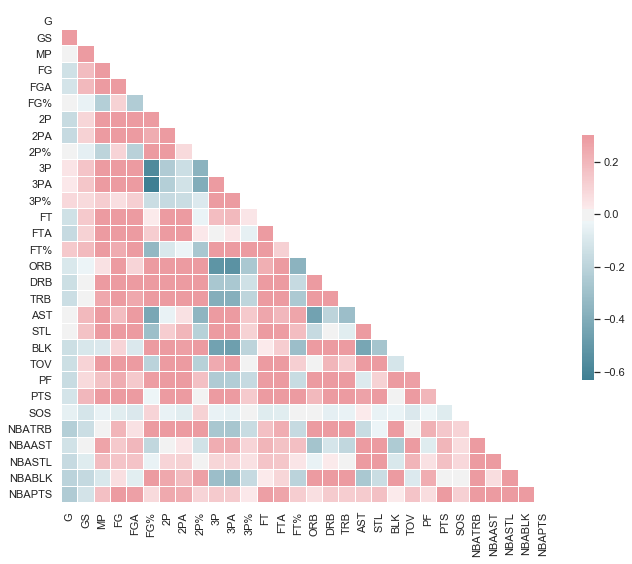

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [423]:
reg.feature_importances_

array([0.03194974, 0.04622337, 0.03428697, 0.03193008, 0.04685337,
       0.03614794, 0.03020863, 0.02755647, 0.02843984, 0.0376547 ,
       0.02568778, 0.02172415, 0.02509291, 0.03874153, 0.02957511,
       0.02945566, 0.02249563, 0.03386932, 0.02344111, 0.0358149 ,
       0.03575484, 0.02431914, 0.02727538, 0.02554798, 0.05870753,
       0.03266685, 0.02989529, 0.02828508, 0.10039871])

In [424]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[22 15 27  9  5  1 28 11  2 12  6  3 24  7 18 19 20 25 29 10 13 16 14 23
  4 17 21 26  8]


In [425]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,29):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,FGA
Name,
Mike Higgins,-2.461782
Ashraf Amaya,0.003288
James Cotton,-2.635379
Eddie Robinson,-1.559081
Gilbert Arenas,0.940708


## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.19538209,  0.01599067, -0.33951238, -0.08571282, -3.07540937,
        0.01102823,  0.20956843,  1.82144143, -0.11116065, -0.29418368,
        1.9409481 , -0.02402133,  0.00958736, -0.23631941, -0.05148885,
       -0.02286249, -0.00883842,  0.07748417,  0.27304169,  0.11109076,
        0.07597179, -0.15097966,  0.00320811,  1.34398593,  0.1084133 ])

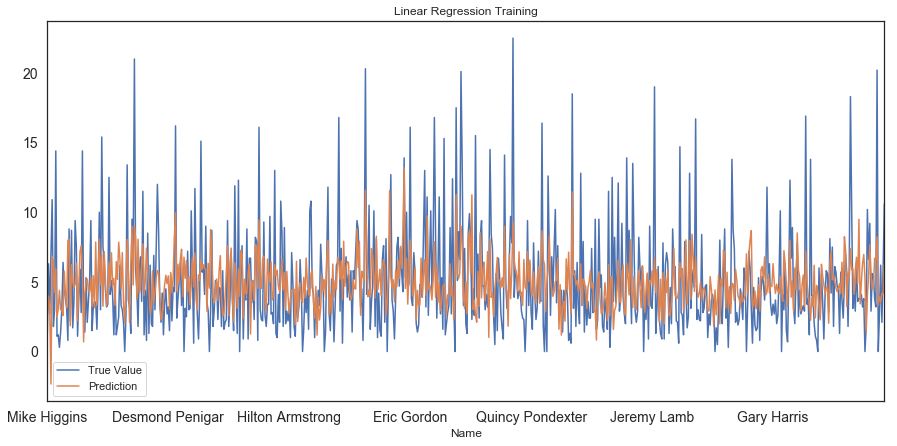

adj train r^2 = 0.18765270197644912
train mse = 11.279101660021425


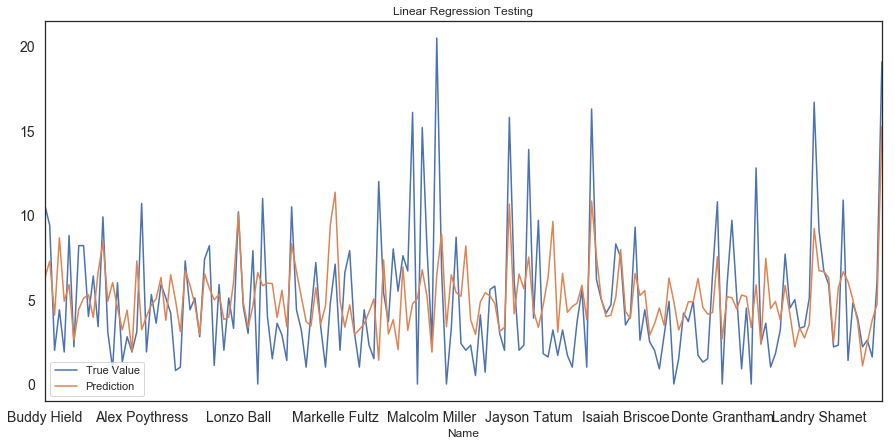

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.21773342642116822
test mse = 11.221680828394021


In [46]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Extra Trees

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

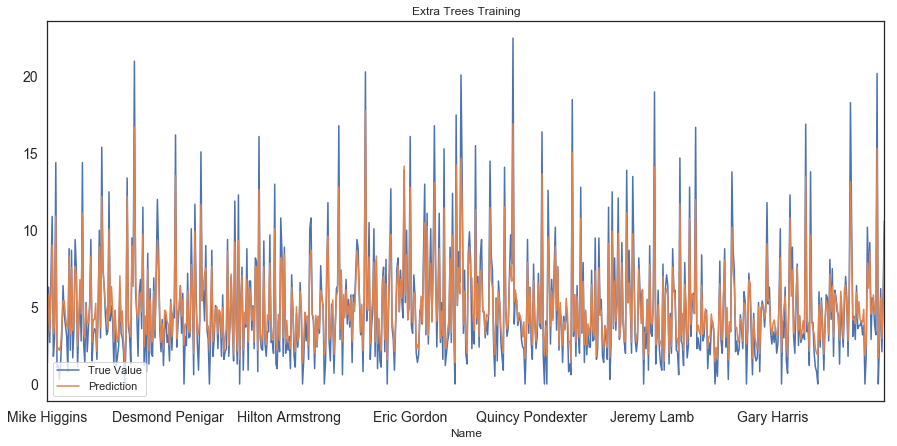

adj train r^2 = 0.8733770204190565
train mse = 1.758106985353539


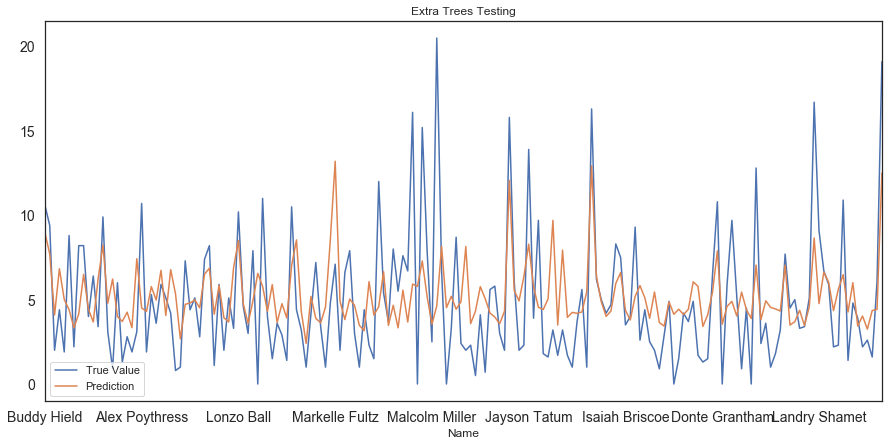

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.23691638910327406
test mse = 10.946499589885057


In [92]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

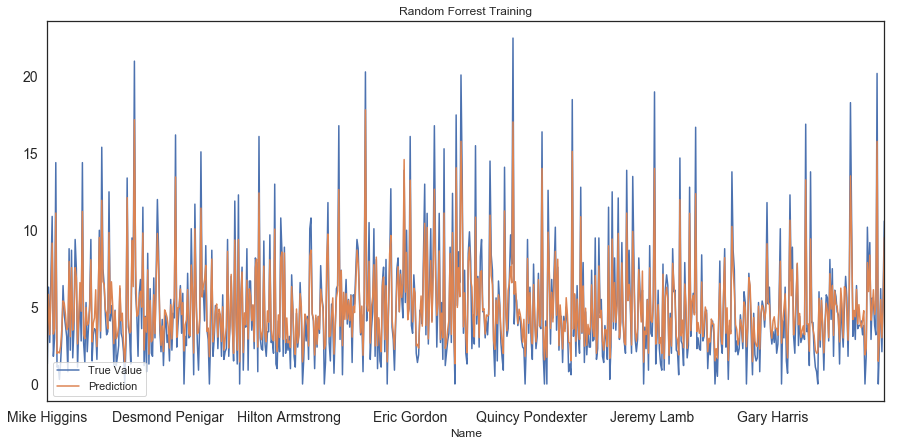

adj train r^2 = 0.8736543311038737
train mse = 1.7542566427561388


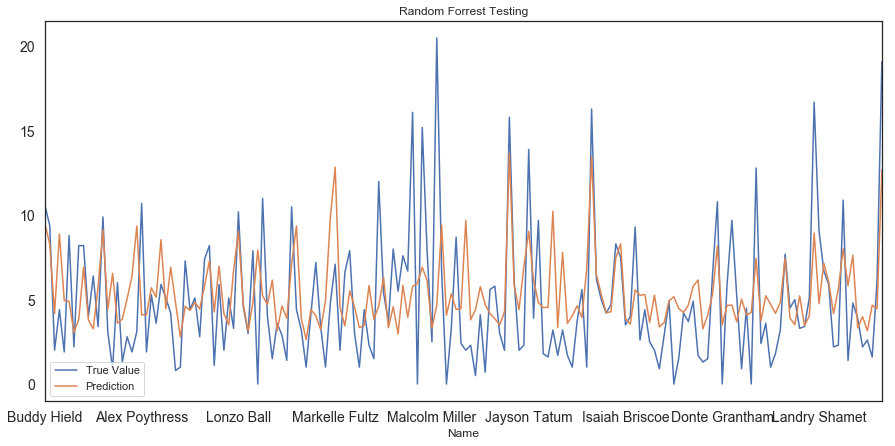

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.18891819100838936
test mse = 11.635037842126444


In [50]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [51]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [52]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

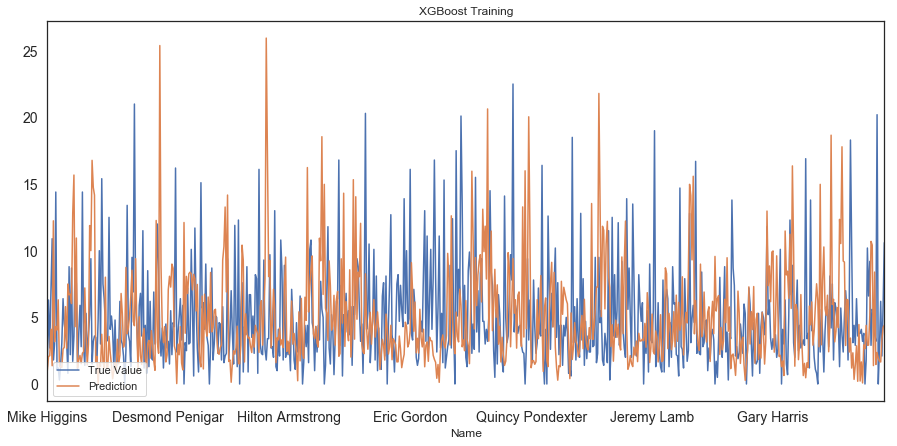

adj train r^2 = -1.1195184494448274
train mse = 29.42862507174378


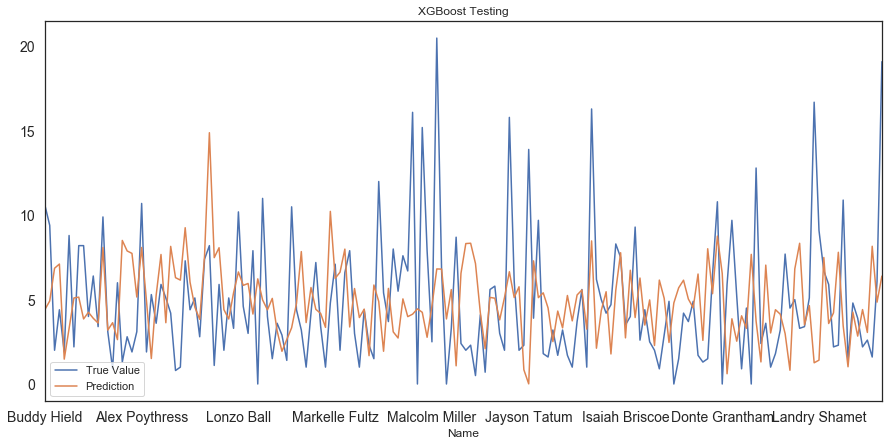

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = -0.3427413698977897
test mse = 19.261739663934534


In [53]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Feed Forward Neural Network

In [54]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [55]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=25, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 693 samples, validate on 174 samples
Epoch 1/500
693/693 [==============================] - 2s 3ms/step - loss: 19.9425 - val_loss: 17.2122
Epoch 2/500
693/693 [==============================] - 0s 120us/step - loss: 15.3365 - val_loss: 13.1561
Epoch 3/500
693/693 [==============================] - 0s 111us/step - loss: 11.6439 - val_loss: 9.9457
Epoch 4/500
693/693 [==============================] - 0s 133us/step - loss: 8.7782 - val_loss: 7.5093
Epoch 5/500
693/693 [==============================] - 0s 143us/step - loss: 6.6319 - val_loss: 5.6761
Epoch 6/500
693/693 [==============================] - 0s 109us/step - loss: 5.0456 - val_loss: 4.3226
Epoch 7/500
693/693 [==============================] - 0s 107us/step - loss: 3.8694 - val_loss: 3.

Epoch 71/500
693/693 [==============================] - 0s 144us/step - loss: 0.8600 - val_loss: 0.7957
Epoch 72/500
693/693 [==============================] - 0s 181us/step - loss: 0.8526 - val_loss: 0.7972
Epoch 73/500
693/693 [==============================] - 0s 130us/step - loss: 0.8540 - val_loss: 0.7969
Epoch 74/500
693/693 [==============================] - 0s 129us/step - loss: 0.8520 - val_loss: 0.7975
Epoch 75/500
693/693 [==============================] - 0s 178us/step - loss: 0.8555 - val_loss: 0.7963
Epoch 76/500
693/693 [==============================] - 0s 151us/step - loss: 0.8601 - val_loss: 0.7972
Epoch 77/500
693/693 [==============================] - 0s 211us/step - loss: 0.8494 - val_loss: 0.7976
Epoch 78/500
693/693 [==============================] - 0s 148us/step - loss: 0.8524 - val_loss: 0.7983
Epoch 79/500
693/693 [==============================] - 0s 119us/step - loss: 0.8435 - val_loss: 0.7989
Epoch 80/500
693/693 [==============================] - 0s 162us

693/693 [==============================] - 0s 106us/step - loss: 0.8370 - val_loss: 0.7737
Epoch 228/500
693/693 [==============================] - 0s 100us/step - loss: 0.8209 - val_loss: 0.7751
Epoch 229/500
693/693 [==============================] - 0s 124us/step - loss: 0.8227 - val_loss: 0.7742
Epoch 230/500
693/693 [==============================] - 0s 99us/step - loss: 0.8232 - val_loss: 0.7734
Epoch 231/500
693/693 [==============================] - 0s 102us/step - loss: 0.8163 - val_loss: 0.7753
Epoch 232/500
693/693 [==============================] - 0s 100us/step - loss: 0.8166 - val_loss: 0.7732
Epoch 233/500
693/693 [==============================] - 0s 129us/step - loss: 0.8204 - val_loss: 0.7738
Epoch 234/500
693/693 [==============================] - 0s 99us/step - loss: 0.8264 - val_loss: 0.7762
Epoch 235/500
693/693 [==============================] - 0s 102us/step - loss: 0.8275 - val_loss: 0.7757
Epoch 236/500
693/693 [==============================] - 0s 99us/step -

693/693 [==============================] - 0s 104us/step - loss: 0.8081 - val_loss: 0.7698
Epoch 384/500
693/693 [==============================] - 0s 128us/step - loss: 0.8196 - val_loss: 0.7677
Epoch 385/500
693/693 [==============================] - 0s 103us/step - loss: 0.8156 - val_loss: 0.7681
Epoch 386/500
693/693 [==============================] - 0s 101us/step - loss: 0.8165 - val_loss: 0.7706
Epoch 387/500
693/693 [==============================] - 0s 100us/step - loss: 0.8189 - val_loss: 0.7710
Epoch 388/500
693/693 [==============================] - 0s 134us/step - loss: 0.8306 - val_loss: 0.7715
Epoch 389/500
693/693 [==============================] - 0s 100us/step - loss: 0.8142 - val_loss: 0.7745
Epoch 390/500
693/693 [==============================] - 0s 101us/step - loss: 0.8265 - val_loss: 0.7730
Epoch 391/500
693/693 [==============================] - 0s 101us/step - loss: 0.8161 - val_loss: 0.7734
Epoch 392/500
693/693 [==============================] - 0s 134us/ste

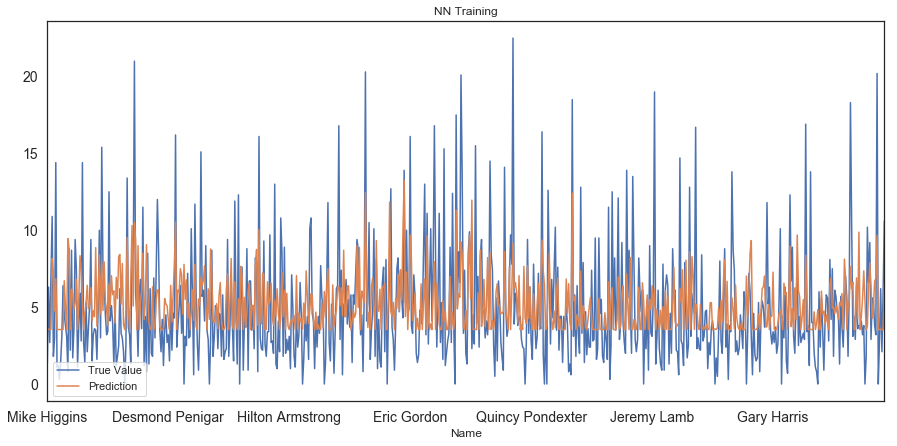

adj train r^2 = 0.19996123250684184
train mse = 11.108202873904267


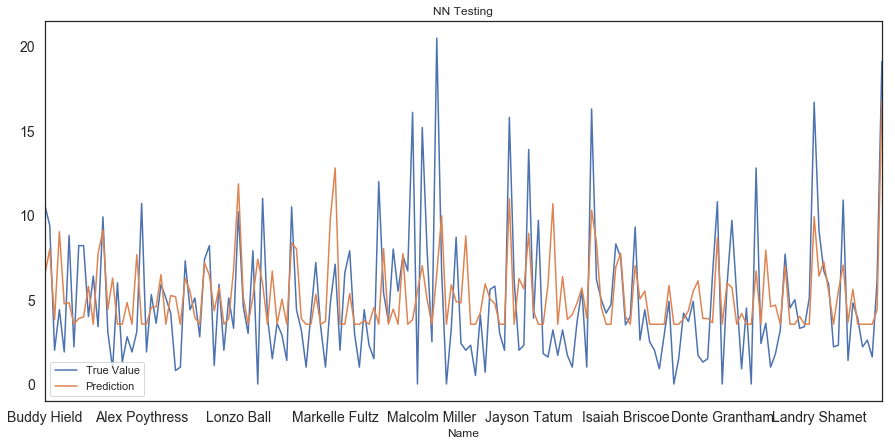

adj test r^2 = 0.24368682657636376
test mse = 10.849377085923237


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## LSTM

In [57]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [58]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 693 samples, validate on 174 samples
Epoch 1/40
693/693 [==============================] - 9s 13ms/step - loss: 0.8708 - val_loss: 0.7775
Epoch 2/40
693/693 [==============================] - 4s 6ms/step - loss: 0.7523 - val_loss: 0.9216
Epoch 3/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6992 - val_loss: 0.7919
Epoch 4/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6140 - val_loss: 0.8490
Epoch 5/40
693/693 [==============================] - 4s 6ms/step - loss: 0.5725 - val_loss: 0.9849
Epoch 6/40
693/693 [==============================] - 4s 6ms/step - loss: 0.5411 - val_loss: 1.3083
Epoch 7/40
693/693 [==============================] - 4s 6ms/step - loss: 0.5173 - val_loss: 1.4220
Epoch 8/40
693/693 [==============================] - 4s 6ms/step - loss: 0.4719 - val_loss: 1.4376
Epoch 9/40
693/693 [==============================] - 4s 6ms/step - loss: 0.4333 - val_loss: 1.3078
Epoch 10/40
693/693 [==============================] 

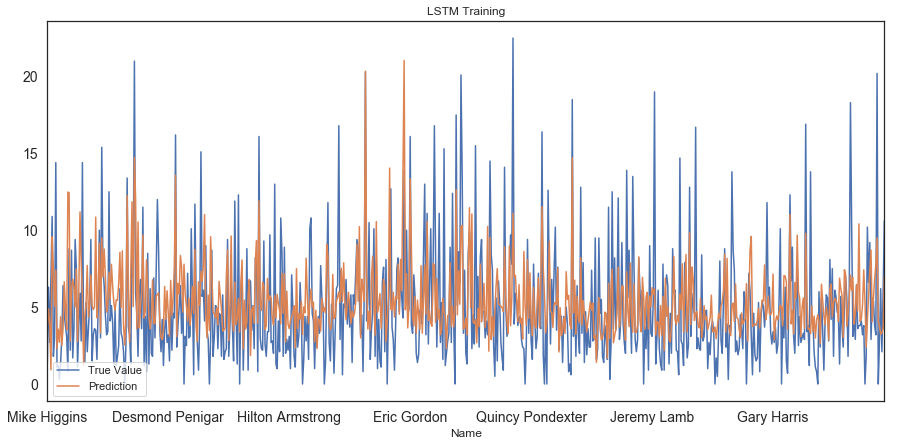

adj train r^2 = 0.20007088611863744
train mse = 11.10668037947628


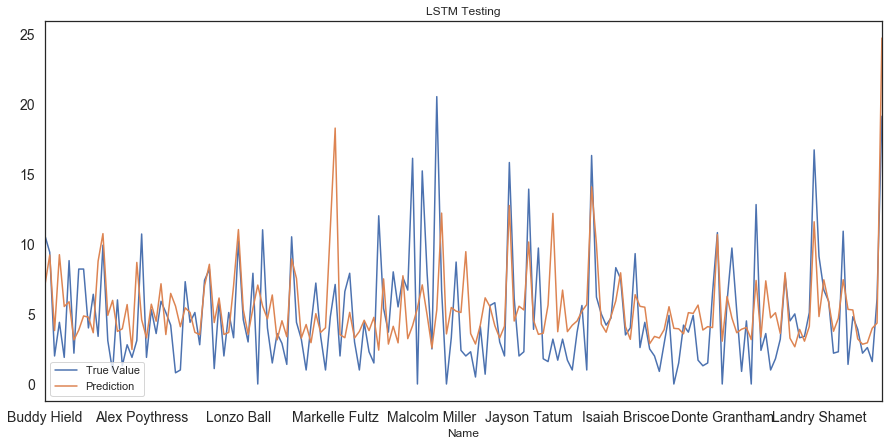

adj test r^2 = 0.1693610635988576
test mse = 11.915586505615877


In [59]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [60]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


0.5078605333333334 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(SelectPercentile(input_matrix, percentile=40), l1_ratio=0.05, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=0.5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

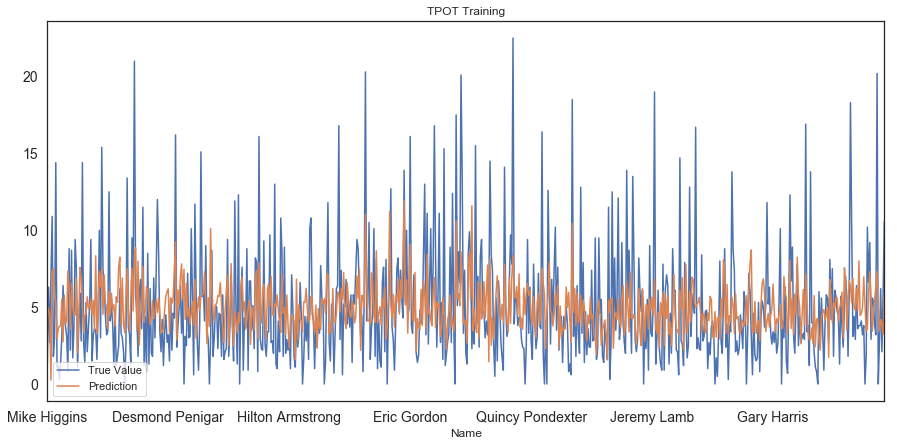

adj train r^2 = 0.14703411982630654
train mse = 11.843073644014048


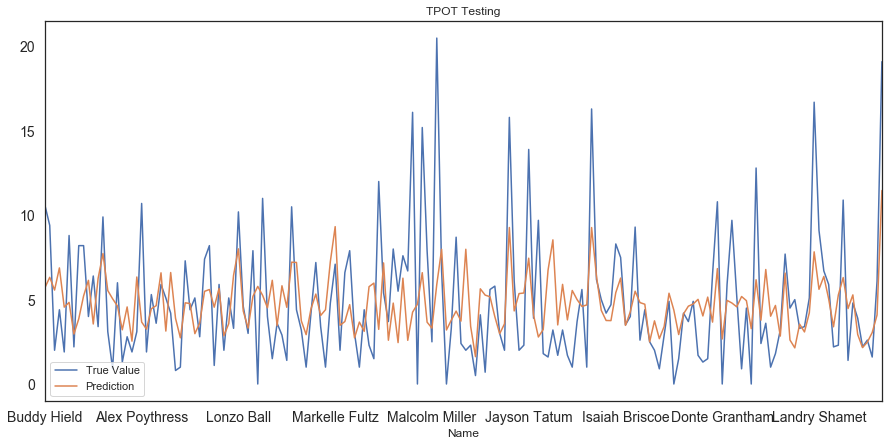

adj test r^2 = 0.20313403969378807
test mse = 11.431110278249507


In [61]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Differences

In [62]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Justin Patton,-1.142277,-0.809825,1.582914,-0.755875,2.0,7.985011,-5.985011
Chris Boucher,-0.575377,-0.809825,-1.083304,-0.755875,0.0,5.782980,-5.782980
Derrick White,-0.291927,-0.407979,-0.550060,-0.065652,3.2,8.542322,-5.342322
James Webb,0.218282,-0.488348,-0.816682,-0.755875,1.6,6.749186,-5.149186
Tyler Lydon,-1.142277,-0.809825,-1.083304,-0.755875,0.0,4.726959,-4.726959


In [63]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.955252,2.163840,2.916023,0.279460,20.5,5.899602,14.600398
Kyle Kuzma,2.429191,0.636823,0.516427,0.624571,16.1,4.257692,11.842308
Collin Sexton,0.501732,1.601255,0.249805,-0.410764,16.7,7.832500,8.867500
Andre Ingram,0.558422,2.003102,2.916023,4.420800,12.0,3.238596,8.761404
Lauri Markkanen,3.109470,0.154607,0.516427,1.314795,15.2,6.597392,8.602608


## 2019 Predictions

In [155]:
train=df3
test=df4
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [156]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    #tpot = TPOTRegressor(max_time_mins=.5, verbosity=1, config_dict='TPOT light')
    #tpot.fit(train_x.values, train_y[col].values.ravel())
    col = cols_at_end[x]
    scalar = scalars[4-x]
    reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
    reg.fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(reg.predict(test_x.values))

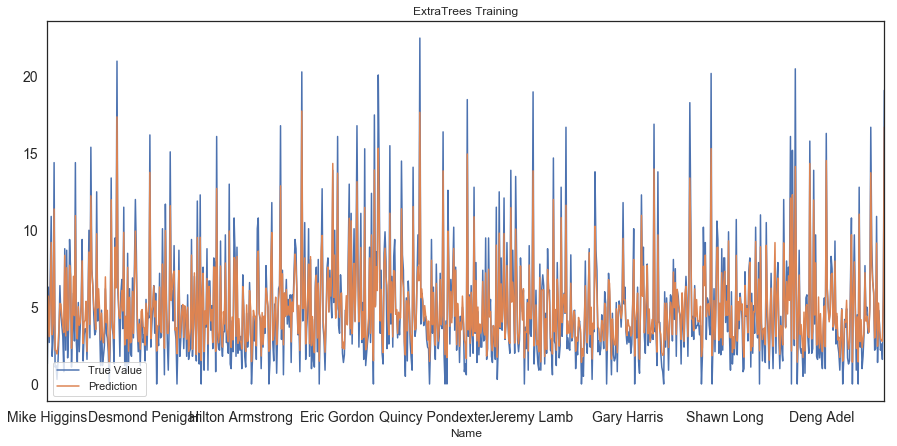

adj train r^2 = 0.8821499437351058
train mse = 1.6573318401963073


In [157]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [159]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.3805,2.3131,1.1619,0.9240,12.9507,30.33465
RJ Barrett,3.3191,2.6839,0.5399,0.2140,11.8871,22.15757
Bol Bol,4.3825,0.8808,0.5294,1.0066,9.9538,21.14200
Cletrell Pope,7.2364,0.8521,0.5074,0.6408,6.8531,20.25953
Jalen Pickett,2.4011,3.9234,0.8686,0.3784,6.7244,19.23182
Charles Bassey,5.0031,0.7419,0.4853,1.0121,6.6208,18.22957
Romeo Langford,3.2295,1.4372,0.4220,0.3509,8.9428,17.29270
Darius Garland,2.5298,1.8864,0.5540,0.2258,8.2399,16.44466
Coby White,1.8991,2.4184,0.4781,0.1385,8.2453,16.00162


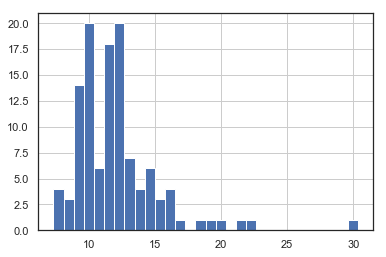

Value Distribution in Draft


In [166]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')